<a href="https://colab.research.google.com/github/anuraag805/FaceMaskDetectionCNN/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:01<00:00, 144MB/s]
100% 163M/163M [00:01<00:00, 148MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1025.jpg', 'with_mask_1017.jpg', 'with_mask_2471.jpg', 'with_mask_2517.jpg', 'with_mask_885.jpg']
['with_mask_3020.jpg', 'with_mask_891.jpg', 'with_mask_26.jpg', 'with_mask_1036.jpg', 'with_mask_220.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2999.jpg', 'without_mask_1673.jpg', 'without_mask_245.jpg', 'without_mask_1665.jpg', 'without_mask_2672.jpg']
['without_mask_1682.jpg', 'without_mask_3701.jpg', 'without_mask_3197.jpg', 'without_mask_909.jpg', 'without_mask_1897.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for two classes

with mask -> 1
without mask -> 0

In [11]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Image

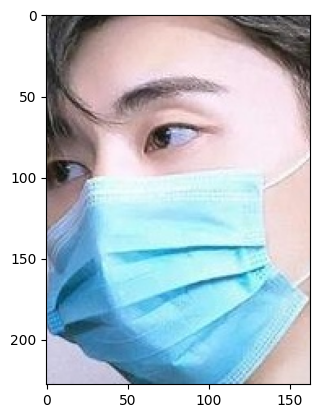

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

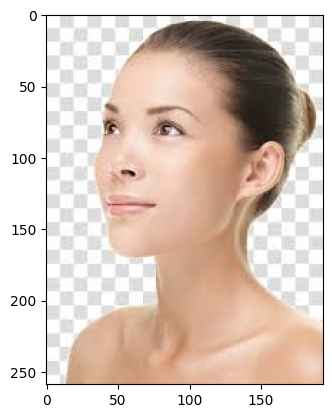

In [16]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing
1. Resize the image
2. Convert the arrays to numpy array

In [22]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [23]:
type(data)

list

In [24]:
len(data)

7553

array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [25, 29, 28],
        [26, 30, 28],
        [27, 30, 28]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [33, 33, 32],
        [33, 34, 31],
        [32, 36, 31]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [40, 39, 37],
        [39, 40, 36],
        [39, 42, 37]]], dtype=uint8)
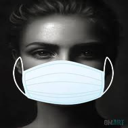

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
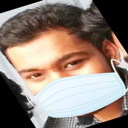

In [36]:
X_train[0]

In [37]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

Building a CNN

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 161s 936ms/step - loss: 0.5173 - acc: 0.7714 - val_loss: 0.2774 - val_acc: 0.8760
Epoch 2/5
170/170 [==============================] - 142s 834ms/step - loss: 0.2986 - acc: 0.8803 - val_loss: 0.2395 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 143s 840ms/step - loss: 0.2447 - acc: 0.9049 - val_loss: 0.1948 - val_acc: 0.9355
Epoch 4/5
170/170 [==============================] - 138s 813ms/step - loss: 0.2175 - acc: 0.9183 - val_loss: 0.1761 - val_acc: 0.9438
Epoch 5/5
170/170 [==============================] - 138s 811ms/step - loss: 0.1975 - acc: 0.9273 - val_loss: 0.1645 - val_acc: 0.9339


Model Evaluation

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 188ms/step - loss: 0.1913 - acc: 0.9219
Test Accuracy = 0.9219059944152832


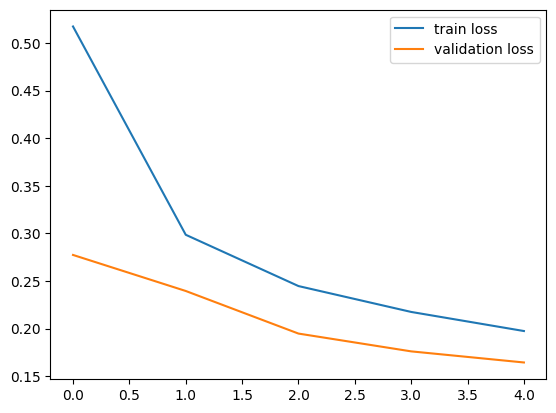

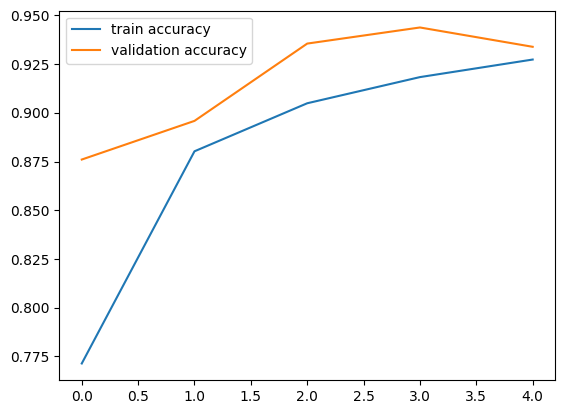

In [47]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Prdictive System

Path of the image to be predicted: /content/OIPwithMask.jpeg


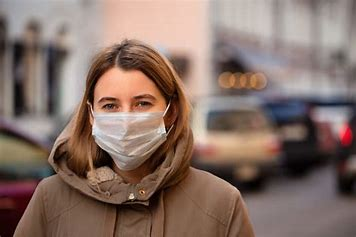

1/1 [==============================] - 0s 32ms/step
[[0.11417593 0.8611712 ]]
1
The person in the image is wearing a mask


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/OIPwithoutMask.jpeg


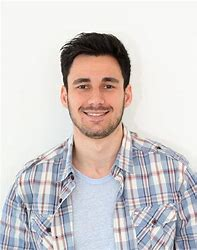

1/1 [==============================] - 0s 33ms/step
[[0.4224478 0.4675994]]
1
The person in the image is wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')